## Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# via terminal
#pip install pandas numpy matplotlib seaborn scikit-learn jupyter
#pip freeze > requirements.txt


In [3]:
# Load the dataset
data_path = '../data/raw/PLHIV Linelist.csv'  # Adjust the path as necessary
df = pd.read_csv(data_path, low_memory=False)


In [4]:
# Display the first few rows of the dataset
df.head()

,Unique_Id,PatientPKHash,SiteCode,FacilityName,SubCounty,County,ARTOutcomeDescription,Gender,DOB,age,...,Height,Weight,Adherence,AdherenceCategory,BP,EverOpportunisticInfections,DateConfirmedHIVPositive,Occupation,DurationOfHIVInfection.Years,DurationOnART.Years
0,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,11258,Bomu Medical Hospital (Changamwe),Changamwe,Mombasa,ACTIVE,Male,1997-12-22 00:00:00.000,27.0,...,NaN,NaN,NaN,ART|CTX,NaN,NaN,2010-01-15,NaN,14.0,14
1,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,13023,Kenyatta National Hospital,Kibra,Nairobi,ACTIVE,Male,1989-07-17 00:00:00.000,35.0,...,174.0,75.8,NaN,ART|CTX,114/71,NaN,2012-11-30,NaN,11.0,11
2,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,13507,Bondo County Referral Hospital,Bondo,Siaya,ACTIVE,Female,1986-02-16 00:00:00.000,38.0,...,158.0,64.0,Good|Good,ART|CTX,NaN,NaN,2016-11-22,Trader,7.0,7
3,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,13781,Maseno Mission Hospital,Kisumu West,Kisumu,ACTIVE,Female,1990-03-22 00:00:00.000,34.0,...,156.1,59.0,Good|Good,ART|CTX,113/71,NaN,NaN,OTHER NON-CODED,NaN,2
4,0002226CD82A5400EA4F199D719FE9BC61F4B18A1668DD...,0002226CD82A5400EA4F199D719FE9BC61F4B18A1668DD...,12875,Babadogo (EDARP),Ruaraka,Nairobi,ACTIVE,Male,1997-09-04 00:00:00.000,27.0,...,165.0,58.0,GOOD,ARV,140/63,NaN,2021-10-07,NaN,2.0,2


In [5]:
# Display summary statistics of the dataset
df.describe()

,SiteCode,age,HasHypertension,ScreenedDiabetes,HasDiabetes,ScreenedForDepression,HasMentalIllness,LastCD4,WhoStage,Height,Weight,DurationOfHIVInfection.Years,DurationOnART.Years
count,1.236671e+06,1.236664e+06,1.236671e+06,1.236671e+06,1.236671e+06,1.236671e+06,1.236671e+06,6.057120e+05,1.072268e+06,1.092416e+06,1.093276e+06,1.152915e+06,1.236671e+06
mean,1.413206e+04,4.273963e+01,4.312707e-02,5.864130e-03,7.520189e-03,5.813276e-01,1.184632e-03,6.348031e+02,1.211722e+00,1.630355e+02,6.320118e+01,9.187478e+00,8.394969e+00
std,2.283988e+03,1.406548e+01,2.031432e-01,7.635278e-02,8.639237e-02,4.933417e-01,3.439810e-02,6.575654e+04,5.564651e-01,1.169834e+01,1.522479e+01,5.389809e+00,4.859445e+00
min,1.001900e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.431000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.292900e+04,3.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.370000e+02,1.000000e+00,1.580000e+02,5.400000e+01,5.000000e+00,5.000000e+00
50%,1.382500e+04,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.060000e+02,1.000000e+00,1.630000e+02,6.200000e+01,9.000000e+00,8.000000e+00
75%,1.522900e+04,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.110000e+02,1.000000e+00,1.690000e+02,7.150000e+01,1.400000e+01,1.200000e+01
max,2.963000e+04,1.130000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.030212e+07,4.000000e+00,9.990000e+02,9.990000e+02,4.400000e+01,4.400000e+01


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unique_Id                             0
PatientPKHash                         0
SiteCode                              0
FacilityName                          0
SubCounty                             0
County                                0
ARTOutcomeDescription                 0
Gender                                0
DOB                                   5
age                                   7
StartARTDate                          0
StartRegimen                      25236
StartRegimenLine                  26126
CurrentRegimen                     2088
CurrentRegimenline                22800
LastVisitDate                         0
LastVLDate                        51908
LastVL                            51908
HasHypertension                       0
ScreenedDiabetes                      0
HasDiabetes                           0
ScreenedForDepression                 0
ScreenedDepressionDate           517760
HasMentalIllness                      0
LastCD4 

In [51]:
# # Explore the distribution of the target variable
# sns.countplot(df['HasDiabetes'])
# plt.title('Distribution of Diabetes Outcome')
# plt.xlabel('Outcome')
# plt.ylabel('Count')
# plt.show()

In [7]:
df['HasDiabetes'].value_counts()

HasDiabetes
0    1227371
1       9300
Name: count, dtype: int64

In [8]:
# WHO Stage
df['WhoStage'].value_counts()

WhoStage
1.0    914111
2.0     96962
3.0     53524
4.0      7671
Name: count, dtype: int64

In [14]:
# Check CD4
def categorize_cd4(count):
    if count <= 200:
        return '<=200'
    else:
        return '>200'


In [17]:
# Age
cd4_bins = [float('-inf'), 200, float('inf')]
cd4_bin_labels = ['<=200', '200+']
df['cd4_category'] = pd.cut(df['LastCD4'], bins=cd4_bins, labels=cd4_bin_labels)
df['cd4_category'].value_counts()

cd4_category
200+     483736
<=200    121976
Name: count, dtype: int64

In [18]:
# Age
age_bins = [float('-inf'), 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]
age_bin_labels = ['<5', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']
df['age_cat'] = pd.cut(df['age'], bins=age_bins, labels=age_bin_labels)
df['age_cat'].value_counts()

age_cat
35-39    182854
45-49    179850
40-44    169089
50-54    134702
30-34    124590
55-59     93630
25-29     85230
60-64     67326
65+       60605
20-24     52566
15-19     39600
10-14     27338
5-9       13843
<5         5441
Name: count, dtype: int64

## AHD Outcome

In [19]:
# Define the function
import pandas as pd
def is_ahd(row):
    """
    Determine if an individual has advanced HIV disease (AHD).

    Parameters:
    row (pd.Series): A row of the DataFrame containing the necessary columns.

    Returns:
    bool: True if the individual has AHD, False otherwise.
    """
    cd4_count = row['LastCD4']
    who_stage = row['WhoStage']
    age = row['age']

    if age < 5:
        return 1
    if cd4_count < 200 or who_stage in [3, 4]:
        return 1
    return 0




In [20]:
df['is_ahd'] = df.apply(is_ahd, axis=1)
df['is_ahd'].value_counts()

is_ahd
0    1059637
1     177034
Name: count, dtype: int64

In [42]:
# AHD By group
grouped = df.groupby('age_cat')['is_ahd'].value_counts().unstack()

# Calculate percentage of is_ahd = 1 within each age group
grouped['percent_is_ahd'] = (grouped[1] / grouped.sum(axis=1)) * 100

# Reset index for clearer presentation
grouped = grouped.reset_index()
grouped

C:\Users\uat6\AppData\Local\Temp\1\ipykernel_14072\2487494983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_cat')['is_ahd'].value_counts().unstack()


is_ahd,age_cat,0,1,percent_is_ahd
0,<5,1460,3981,73.166697
1,5-9,13086,757,5.468468
2,10-14,25443,1895,6.931743
3,15-19,35791,3809,9.618687
4,20-24,47868,4698,8.937336
5,25-29,78919,6311,7.404670
6,30-34,113516,11074,8.888354
7,35-39,161250,21604,11.814891
8,40-44,144050,25039,14.808178
9,45-49,148557,31293,17.399500


C:\Users\uat6\AppData\Local\Temp\1\ipykernel_14072\3661824220.py:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


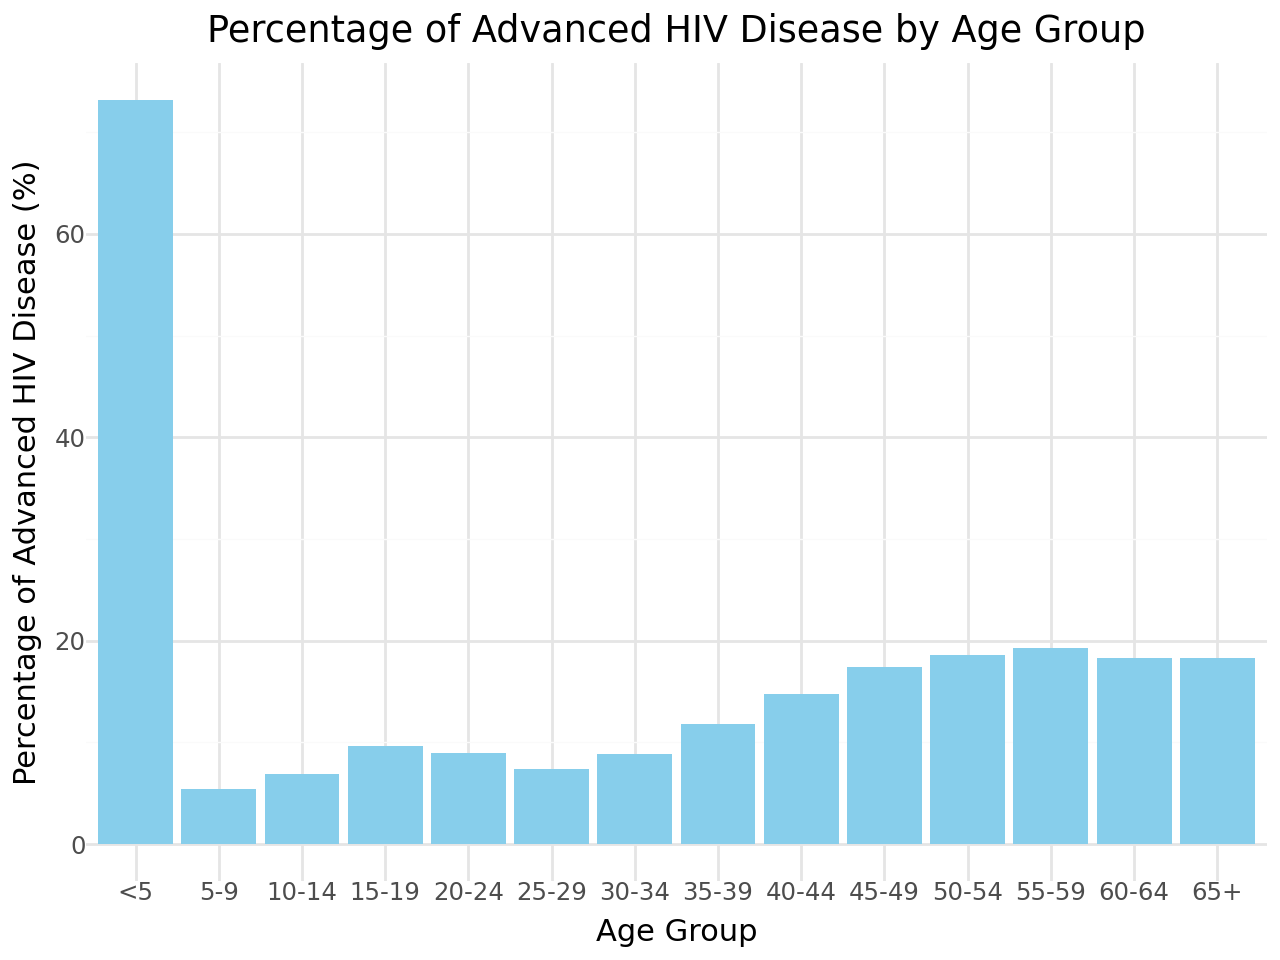

In [44]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal

# Plot using plotnine
plot = (
    ggplot(grouped, aes(x='age_cat', y='percent_is_ahd')) +
    geom_bar(stat='identity', fill='skyblue') +
    labs(title='Percentage of Advanced HIV Disease by Age Group',
         x='Age Group',
         y='Percentage of Advanced HIV Disease (%)') +
    theme_minimal()
)

# Display the plot
print(plot)


## Correlation between CD4 and WHO staging